# **Project 1: Stock Market Prediction**

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('infolimpioavanzadoTarget.csv')

# Analyzing the dataset

In [3]:
dataset.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [4]:
dataset.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02,119.000000,119.000000,109.000000,109.000000,...,119.000000,119.000000,117.000000,119.000000,117.000000,117.000000,133.000000,133.000000,133.000000,133.000000
mean,15.000187,15.323828,14.678799,14.981716,14.981716,1.116963e+05,47.507285,49.812155,48.386046,49.856924,...,16.044235,52.235121,52.270853,52.235121,52.270853,0.655071,0.966448,-0.015489,0.366289,0.180451
std,1.011206,1.025920,1.010765,0.993556,0.993556,1.029078e+05,10.746692,5.422005,4.860806,4.017006,...,0.929849,29.088869,26.425545,29.088869,26.425545,12.878281,0.890699,0.823690,5.614998,0.386017
min,13.120000,13.550000,12.780000,12.860000,12.860000,3.440000e+04,7.689906,40.924816,35.631228,44.770056,...,14.347000,1.923075,5.976293,1.923075,5.976293,-36.009395,0.296808,-2.280000,-11.993687,0.000000
25%,14.105000,14.402500,13.878500,14.180000,14.180000,6.612500e+04,42.376215,46.750725,44.650896,47.931105,...,15.090000,25.862823,27.405325,25.862823,27.405325,-6.732925,0.569456,-0.460000,-2.819668,0.000000
50%,14.985000,15.420000,14.595000,14.990000,14.990000,8.795000e+04,49.537280,48.302880,48.710534,48.721453,...,16.299999,52.416359,56.652966,52.416359,56.652966,-0.560224,0.760138,-0.040001,-0.244954,0.000000
75%,15.747500,16.070000,15.530000,15.742500,15.742500,1.282500e+05,53.615336,51.357244,51.032477,50.807308,...,16.910000,78.898151,77.323417,78.898151,77.323417,11.403695,1.110440,0.510000,3.582086,0.000000
max,17.799999,18.309999,17.620001,17.760000,17.760000,1.108800e+06,66.392226,83.437584,59.609033,78.968102,...,18.309999,98.820728,94.169625,98.820728,94.169625,34.825371,9.566868,2.039999,16.571883,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 1.3+ MB


In [6]:
dataset.nunique()

date                134
open                108
high                114
low                 117
close               107
                   ... 
stochastic-kd-15    117
volumenrelativo     127
diff                123
INCREMENTO          133
TARGET                2
Length: 1285, dtype: int64

In [7]:
dataset.isnull().sum()

date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    17
volumenrelativo      1
diff                 1
INCREMENTO           1
TARGET               1
Length: 1285, dtype: int64

In [8]:
cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date', 'ticker'], dtype='object')
Numerical Variables:
['open', 'high', 'low', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0', 'MACDdif-adjclose-25-1', 'MACDdif-adjclose-25-2', 'MACDdif-adjclose-25-3', 'MACDsig-volume-25', 'MACDdif-volume-25-0', 'MACDdif-volume-25-1', 'MACDdif-volume-25-2', 'MACDdif-volume-25-3', 'MACDsig-adjclose-50', 'MACDdif-adjclose-50-0', 'MACDdif-adjclose-50-1', 'MACDdif-adjclose-50-2', 'MACDdif-adjclose-50-3', 'MACDsig-volume-50', 'MACDdif-volume-50-0', 'MACDdif-volume-50-1',

# Transforming dataset

In [9]:
dataset = dataset.drop(['date'] , axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 1284 entries, open to TARGET
dtypes: float64(1281), int64(2), object(1)
memory usage: 1.3+ MB


In [10]:
def swap_columns(dset, col1, col2):
    col_list = list(dset.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    dset = dset[col_list]
    return dset

In [11]:
dataset = swap_columns(dataset, 'adjclose', 'volume')

In [12]:
dataset.describe()

,open,high,low,close,volume,adjclose,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,134.000000,134.000000,134.000000,134.000000,1.340000e+02,134.000000,119.000000,119.000000,109.000000,109.000000,...,119.000000,119.000000,117.000000,119.000000,117.000000,117.000000,133.000000,133.000000,133.000000,133.000000
mean,15.000187,15.323828,14.678799,14.981716,1.116963e+05,14.981716,47.507285,49.812155,48.386046,49.856924,...,16.044235,52.235121,52.270853,52.235121,52.270853,0.655071,0.966448,-0.015489,0.366289,0.180451
std,1.011206,1.025920,1.010765,0.993556,1.029078e+05,0.993556,10.746692,5.422005,4.860806,4.017006,...,0.929849,29.088869,26.425545,29.088869,26.425545,12.878281,0.890699,0.823690,5.614998,0.386017
min,13.120000,13.550000,12.780000,12.860000,3.440000e+04,12.860000,7.689906,40.924816,35.631228,44.770056,...,14.347000,1.923075,5.976293,1.923075,5.976293,-36.009395,0.296808,-2.280000,-11.993687,0.000000
25%,14.105000,14.402500,13.878500,14.180000,6.612500e+04,14.180000,42.376215,46.750725,44.650896,47.931105,...,15.090000,25.862823,27.405325,25.862823,27.405325,-6.732925,0.569456,-0.460000,-2.819668,0.000000
50%,14.985000,15.420000,14.595000,14.990000,8.795000e+04,14.990000,49.537280,48.302880,48.710534,48.721453,...,16.299999,52.416359,56.652966,52.416359,56.652966,-0.560224,0.760138,-0.040001,-0.244954,0.000000
75%,15.747500,16.070000,15.530000,15.742500,1.282500e+05,15.742500,53.615336,51.357244,51.032477,50.807308,...,16.910000,78.898151,77.323417,78.898151,77.323417,11.403695,1.110440,0.510000,3.582086,0.000000
max,17.799999,18.309999,17.620001,17.760000,1.108800e+06,17.760000,66.392226,83.437584,59.609033,78.968102,...,18.309999,98.820728,94.169625,98.820728,94.169625,34.825371,9.566868,2.039999,16.571883,1.000000


In [13]:
dataset = dataset[['open' , 'high' , 'low' , 'close' , 'volume' , 'adjclose']]
dataset.head()

,open,high,low,close,volume,adjclose
0,17.799999,18.219000,17.500000,17.760000,106600,17.760000
1,17.700001,18.309999,17.620001,17.660000,128700,17.660000
2,17.580000,17.799999,16.910000,16.950001,103100,16.950001
3,16.650000,16.879999,16.139999,16.170000,173600,16.170000
4,16.219999,16.290001,15.630000,15.710000,137800,15.710000


# Analyzing Skewness

open
Skew : 0.25


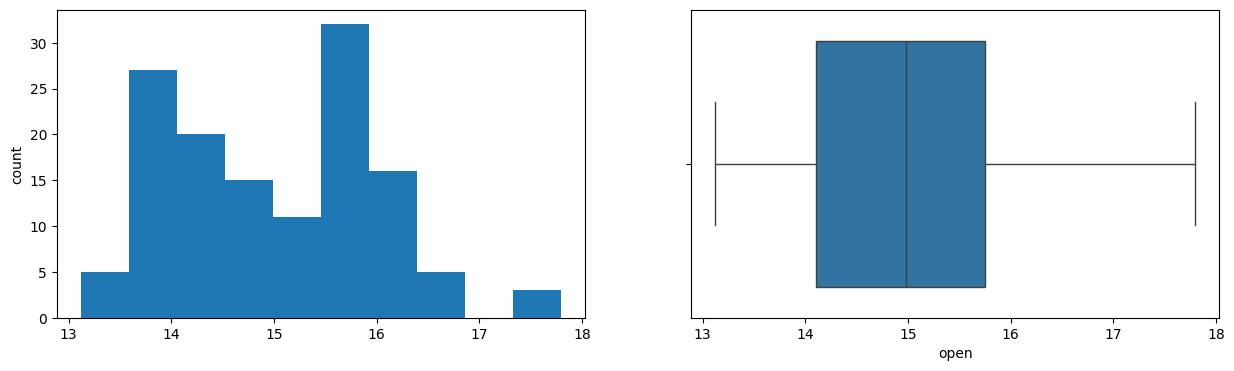

high
Skew : 0.28


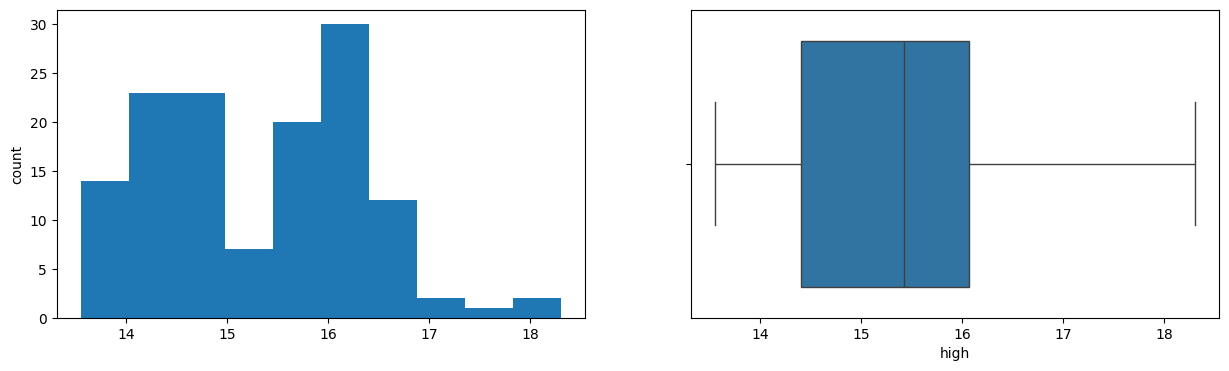

low
Skew : 0.2


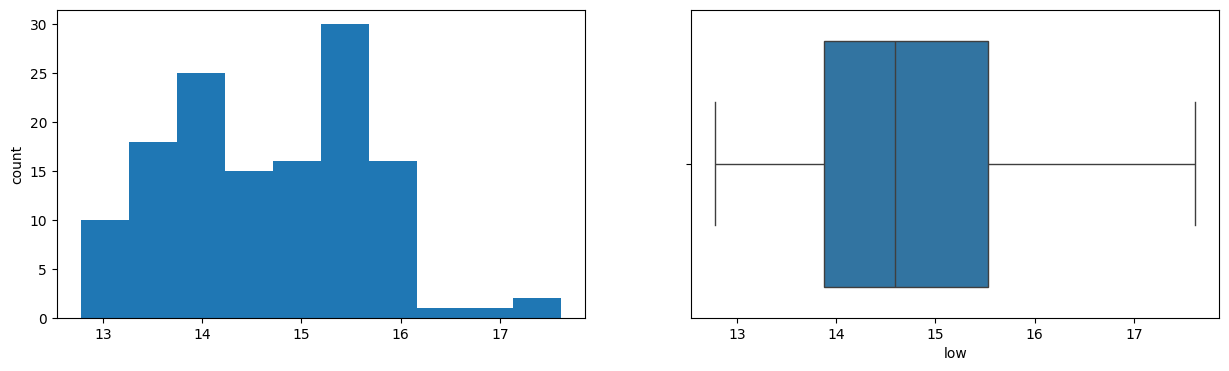

close
Skew : 0.13


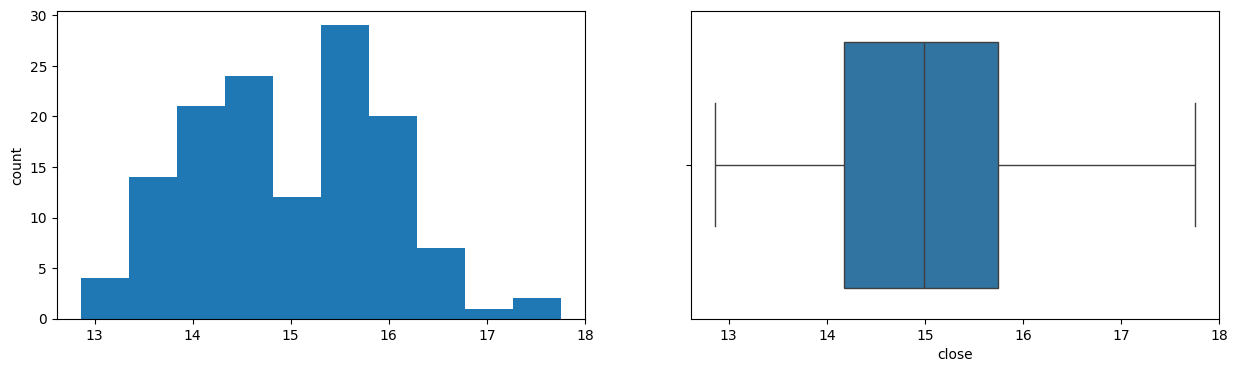

adjclose
Skew : 0.13


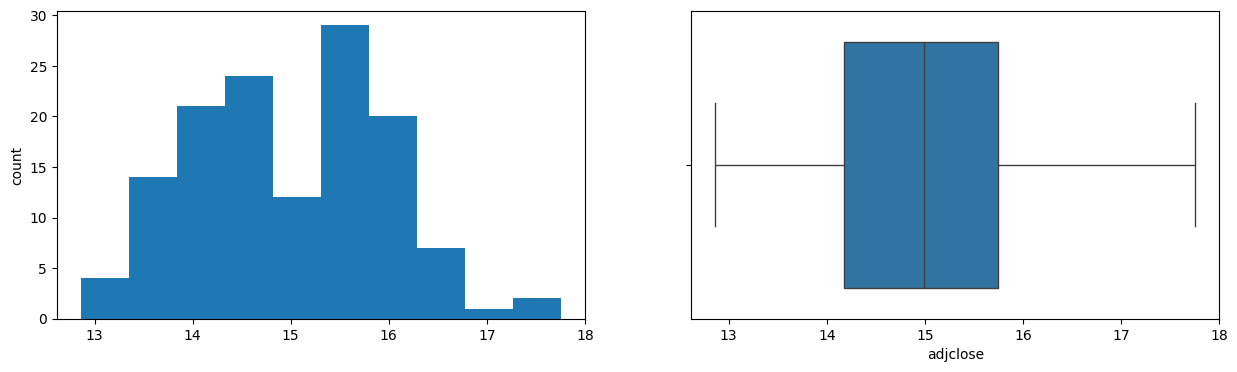

volume
Skew : 7.18


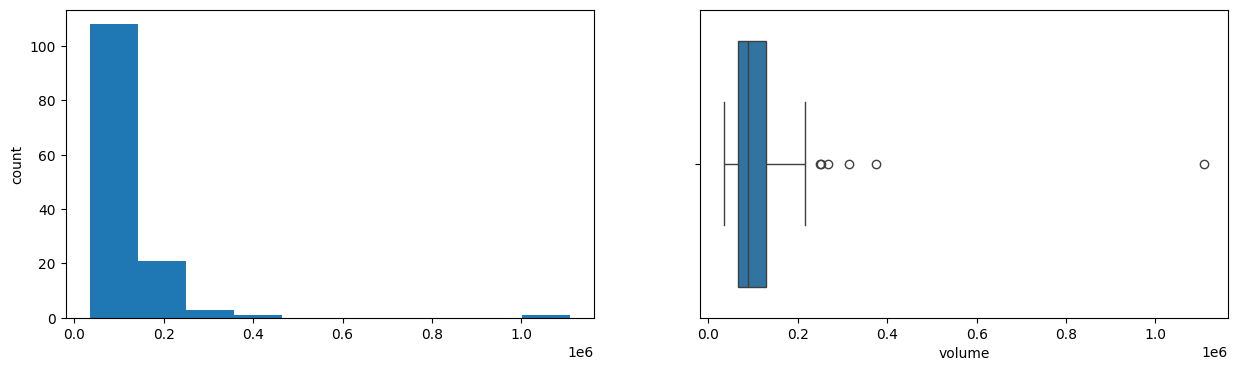

RSIadjclose15


KeyError: 'RSIadjclose15'

In [14]:
for col in num_cols:
    print(col)
    print('Skew :', round(dataset[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dataset[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col])
    plt.show()

# Analyzing relationship between different parameters

<Figure size 1300x1700 with 0 Axes>

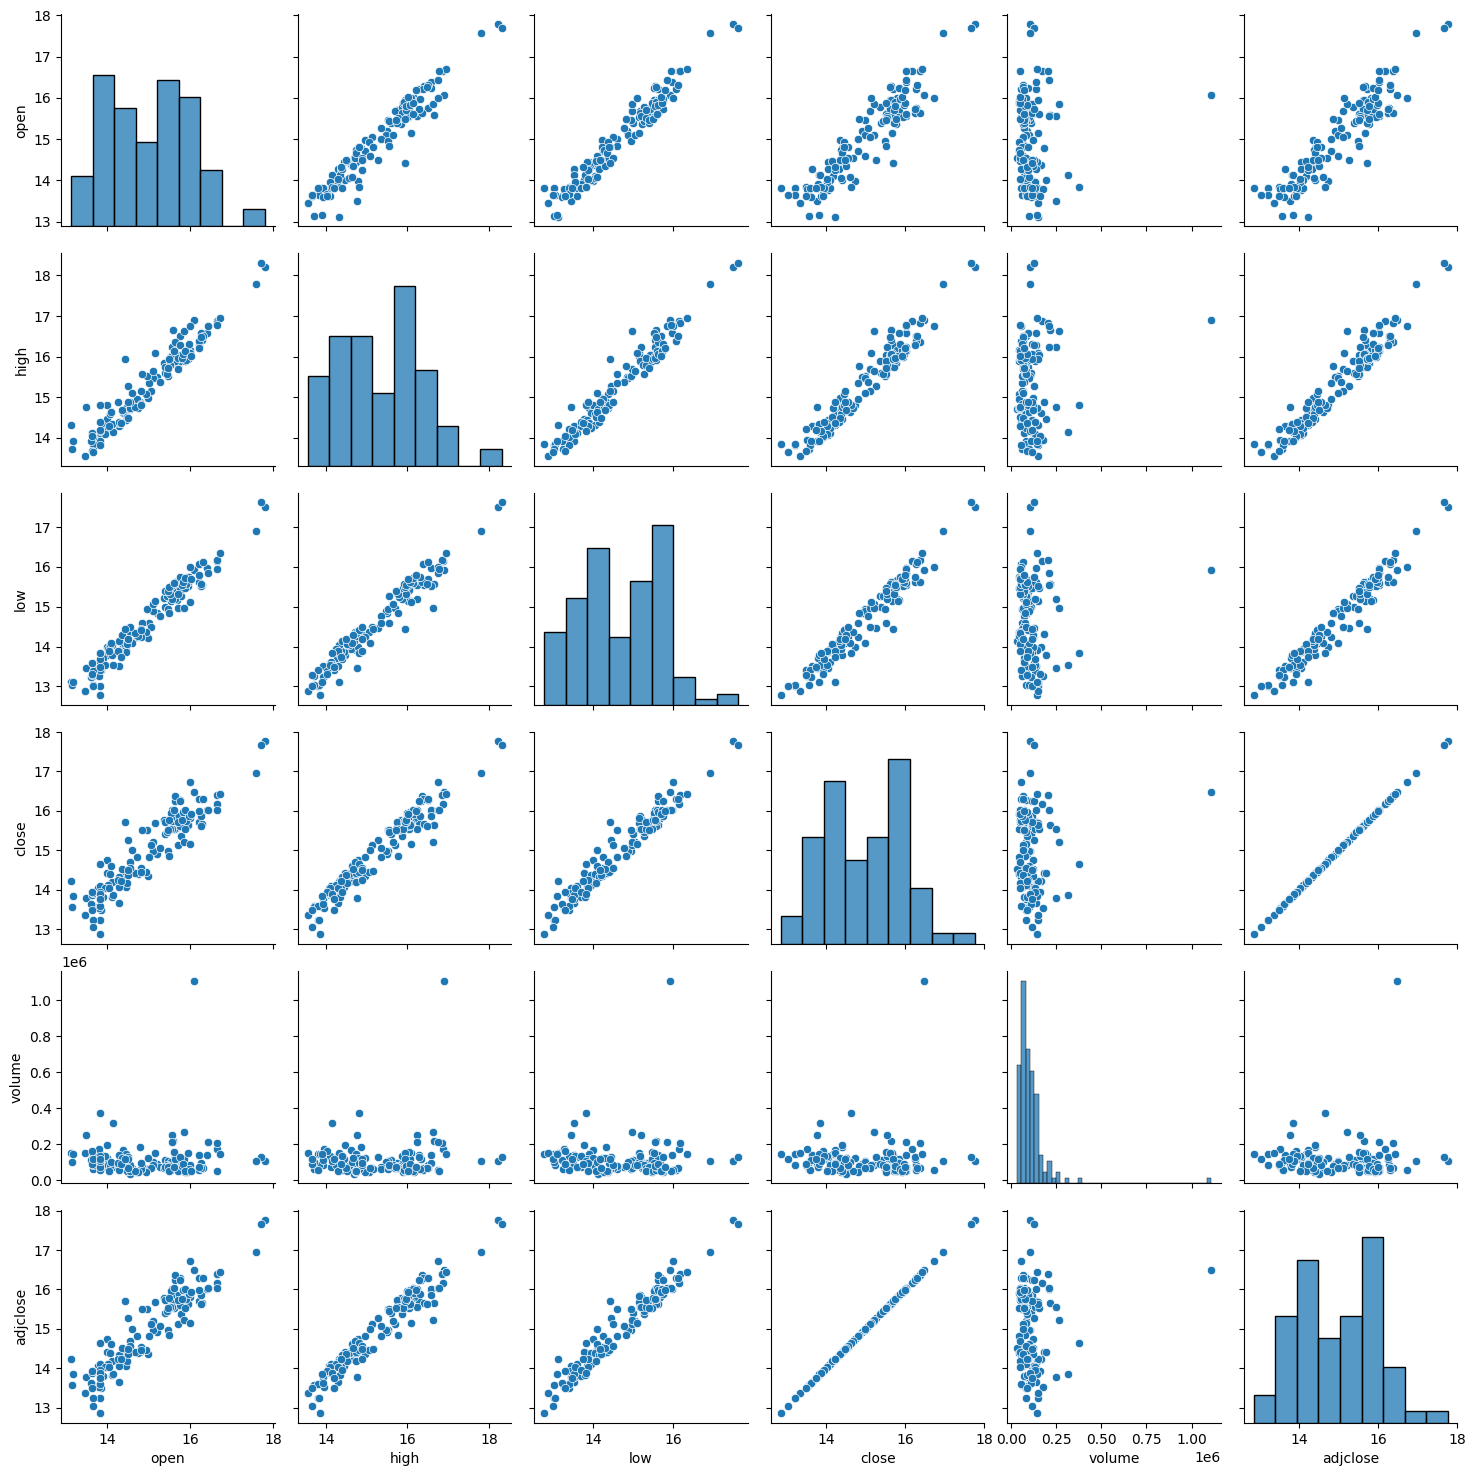

In [15]:
plt.figure(figsize=(13,17))
sns.pairplot(data=dataset)
plt.show()

# Heat Map to analyze Correlation

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

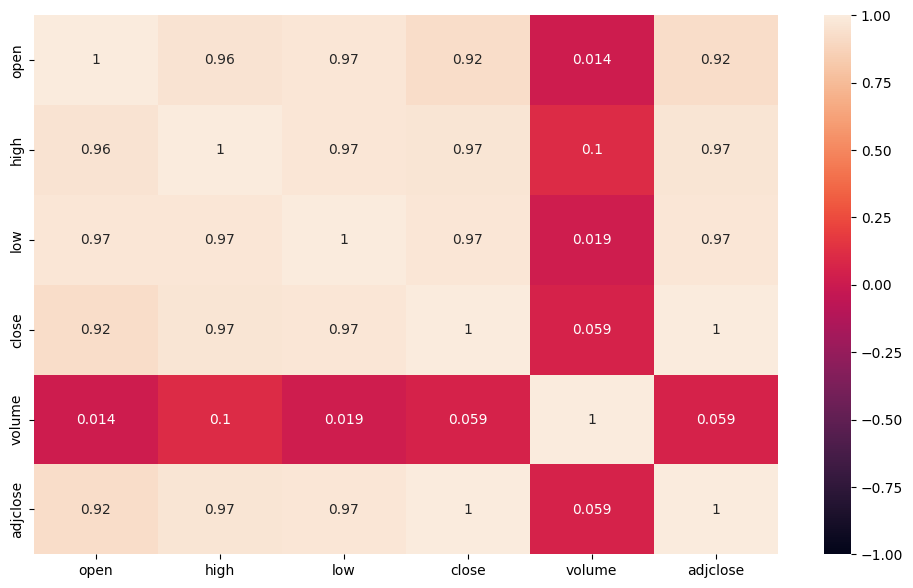

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(dataset.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Transforming the dataset

In [17]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [18]:
print(X)

[[1.77999992e+01 1.82189999e+01 1.75000000e+01 1.77600002e+01
  1.06600000e+05]
 [1.77000008e+01 1.83099995e+01 1.76200008e+01 1.76599998e+01
  1.28700000e+05]
 [1.75799999e+01 1.77999992e+01 1.69099998e+01 1.69500008e+01
  1.03100000e+05]
 [1.66499996e+01 1.68799992e+01 1.61399994e+01 1.61700001e+01
  1.73600000e+05]
 [1.62199993e+01 1.62900009e+01 1.56300001e+01 1.57100000e+01
  1.37800000e+05]
 [1.56800003e+01 1.60100002e+01 1.51700001e+01 1.58599997e+01
  1.16700000e+05]
 [1.57500000e+01 1.65000000e+01 1.56899996e+01 1.62800007e+01
  8.58000000e+04]
 [1.63899994e+01 1.65799999e+01 1.59700003e+01 1.60200005e+01
  1.36900000e+05]
 [1.60000000e+01 1.61700001e+01 1.56800003e+01 1.58100004e+01
  6.91000000e+04]
 [1.56999998e+01 1.57500000e+01 1.53599997e+01 1.55900002e+01
  9.29000000e+04]
 [1.53900003e+01 1.55889997e+01 1.50000000e+01 1.53999996e+01
  1.08700000e+05]
 [1.54600000e+01 1.55299997e+01 1.49429998e+01 1.49799995e+01
  1.03900000e+05]
 [1.51999998e+01 1.54899998e+01 1.485000

In [19]:
print(Y)

[17.76000023 17.65999985 16.95000076 16.17000008 15.71000004 15.85999966
 16.28000069 16.02000046 15.81000042 15.59000015 15.39999962 14.97999954
 14.90999985 14.40999985 14.40999985 14.22999954 14.18000031 13.64999962
 13.22999954 14.22999954 14.38000011 14.06000042 13.48999977 13.57999992
 14.05000019 14.73999977 14.97999954 15.27000046 15.06000042 14.81999969
 15.5        15.77000046 15.11999989 15.21000004 15.68000031 15.36999989
 15.51000023 15.82999992 15.65999985 15.55000019 16.25       15.65999985
 15.52000046 15.64999962 15.52999973 15.60999966 15.44999981 14.85000038
 14.35000038 15.22000027 15.55000019 16.02000046 16.47999954 16.38999939
 16.03000069 15.63000011 16.37000084 16.29000092 15.85999966 15.92000008
 15.64000034 15.72000027 16.25       16.29999924 15.61999989 15.55000019
 15.94999981 15.52999973 15.52000046 15.72000027 15.77000046 15.75
 16.03000069 16.72999954 16.43000031 16.03000069 15.14999962 15.11999989
 14.44999981 14.47999954 14.81999969 14.47999954 14.55000

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train)

[[1.59200001e+01 1.61700001e+01 1.57500000e+01 1.59200001e+01
  4.69000000e+04]
 [1.60000000e+01 1.67600002e+01 1.60000000e+01 1.67299995e+01
  5.52000000e+04]
 [1.50900002e+01 1.56350002e+01 1.50550003e+01 1.52100000e+01
  8.13000000e+04]
 [1.49499998e+01 1.55299997e+01 1.49499998e+01 1.55000000e+01
  6.01000000e+04]
 [1.44600000e+01 1.45200005e+01 1.40699997e+01 1.41700001e+01
  5.25000000e+04]
 [1.42700005e+01 1.43900003e+01 1.41499996e+01 1.43299999e+01
  5.62000000e+04]
 [1.58800001e+01 1.61399994e+01 1.57100000e+01 1.60100002e+01
  5.21000000e+04]
 [1.45400000e+01 1.46999998e+01 1.41300001e+01 1.45200005e+01
  3.44000000e+04]
 [1.58100004e+01 1.59700003e+01 1.55459995e+01 1.57600002e+01
  7.95000000e+04]
 [1.47799997e+01 1.48699999e+01 1.43199997e+01 1.44099998e+01
  1.83500000e+05]
 [1.55299997e+01 1.60000000e+01 1.55299997e+01 1.59499998e+01
  5.73000000e+04]
 [1.47299995e+01 1.47299995e+01 1.42700005e+01 1.43900003e+01
  4.18000000e+04]
 [1.57399998e+01 1.62900009e+01 1.573999

In [22]:
print(Y_train)

[15.92000008 16.72999954 15.21000004 15.5        14.17000008 14.32999992
 16.01000023 14.52000046 15.76000023 14.40999985 15.94999981 14.39000034
 16.25       16.02000046 14.22999954 16.37000084 16.25       14.02999973
 16.03000069 16.17000008 14.10000038 16.28000069 14.40999985 15.72000027
 14.60999966 15.75       14.56000042 15.14999962 13.75       13.22999954
 14.44999981 15.27000046 13.22999954 13.84000015 14.97999954 14.10999966
 14.06000042 15.         13.52000046 15.65999985 13.86999989 17.65999985
 13.94999981 14.44999981 15.52000046 15.71000004 13.64999962 15.65999985
 15.85999966 16.38999939 14.22999954 14.39000034 17.76000023 15.68000031
 15.06000042 15.63000011 16.03000069 15.36999989 13.57999992 16.43000031
 15.77000046 13.77000046 16.29000092 14.69999981 14.64999962 15.11999989
 15.93000031 14.40999985 13.59000015 14.22999954 14.81999969 15.22000027
 15.71000004 14.18000031 14.55000019 15.61999989 15.98999977 14.47999954
 15.72000027 14.81999969 14.38000011 15.97999954 16

In [23]:
print(X_test)

[[1.31400003e+01 1.37100000e+01 1.30240002e+01 1.35699997e+01
  1.00100000e+05]
 [1.54600000e+01 1.57299995e+01 1.54049997e+01 1.55200005e+01
  7.21000000e+04]
 [1.50900002e+01 1.54790001e+01 1.48800001e+01 1.49799995e+01
  9.93000000e+04]
 [1.60000000e+01 1.61700001e+01 1.56800003e+01 1.58100004e+01
  6.91000000e+04]
 [1.41199999e+01 1.43470001e+01 1.37900000e+01 1.38199997e+01
  8.97000000e+04]
 [1.55799999e+01 1.66499996e+01 1.55699997e+01 1.56499996e+01
  2.15200000e+05]
 [1.63099995e+01 1.65000000e+01 1.61200008e+01 1.62999992e+01
  6.86000000e+04]
 [1.49700003e+01 1.49700003e+01 1.42200003e+01 1.43500004e+01
  1.23800000e+05]
 [1.57399998e+01 1.60499992e+01 1.54300003e+01 1.56099997e+01
  7.25000000e+04]
 [1.36199999e+01 1.40400000e+01 1.33100004e+01 1.39300003e+01
  1.59400000e+05]
 [1.60799999e+01 1.69099998e+01 1.59250002e+01 1.64799995e+01
  1.10880000e+06]
 [1.45000000e+01 1.48800001e+01 1.41800003e+01 1.44899998e+01
  1.16700000e+05]
 [1.36300001e+01 1.36599998e+01 1.329000

In [24]:
print(Y_test)

[13.56999969 15.52000046 14.97999954 15.81000042 13.81999969 15.64999962
 16.29999924 14.35000038 15.60999966 13.93000031 16.47999954 14.48999977
 13.48999977 15.55000019 13.48999977 13.80000019 13.92000008 13.35999966
 16.02000046 14.05000019 15.52999973 15.39999962 13.63000011 15.64000034
 14.18000031 16.95000076 15.88000011]


# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
print(X_train)

[[ 0.93077858  0.85123256  1.09142545  0.93876091 -0.95907504]
 [ 1.01315083  1.45292463  1.34975957  1.77504779 -0.81393991]
 [ 0.07616571  0.30563072  0.37325691  0.20571881 -0.35755112]
 [-0.06798622  0.19854945  0.26475607  0.50513032 -0.72825773]
 [-0.57251652 -0.83146478 -0.64458014 -0.86803291 -0.86115254]
 [-0.76815038 -0.96404108 -0.5619133  -0.70284049 -0.79645375]
 [ 0.88959245  0.82063735  1.05009203  1.0316819  -0.86814701]
 [-0.49014427 -0.64789842 -0.58257952 -0.50667375 -1.17765205]
 [ 0.81751698  0.64726939  0.88062432  0.77356849 -0.38902621]
 [-0.24302751 -0.47452948 -0.38624602 -0.62024428  1.42953447]
 [ 0.52921311  0.67786362  0.86409115  0.96973425 -0.77721897]
 [-0.29451041 -0.61730419 -0.43791206 -0.64089284 -1.04825446]
 [ 0.74544052  0.97361143  1.08109185  1.27947053  0.4188344 ]
 [ 0.54980666  0.92261942  0.88475835  1.04200667  1.95062205]
 [-0.65488877 -0.72948369 -0.72724698 -0.80608624  1.11478358]
 [ 0.63217891  1.0551967   0.96742519  1.40336583 -0.57

In [27]:
print(X_test)

[[-1.93165968 -1.65751682 -1.7254496  -1.48750547 -0.02881131]
 [ 0.45713763  0.40251262  0.73492409  0.52577986 -0.5184238 ]
 [ 0.07616571  0.14653916  0.19242283 -0.03174603 -0.04280024]
 [ 1.01315083  0.85123256  1.01909221  0.82519137 -0.57088228]
 [-0.92259909 -1.00789343 -0.93391408 -1.22939207 -0.21066738]
 [ 0.58069601  1.34074416  0.90542457  0.65999797  1.98384575]
 [ 1.33234307  1.18777203  1.47376081  1.33109242 -0.57962536]
 [-0.04739267 -0.37254741 -0.48957908 -0.68219094  0.38561069]
 [ 0.74544052  0.72885369  0.76075809  0.61869986 -0.51142934]
 [-1.43742616 -1.32097736 -1.42991511 -1.11582154  1.008118  ]
 [ 1.09552309  1.60589676  1.27225953  1.51693439 17.60947869]
 [-0.53133039 -0.46433108 -0.5309125  -0.53764807  0.26145895]
 [-1.42712939 -1.70850786 -1.45058232 -1.57010168 -0.23864523]
 [ 0.54980666  0.92261942  0.52309019  0.5567532   2.60810168]
 [-1.21090198 -1.14760842 -1.32658206 -1.57010168 -0.33132188]
 [-1.14912328 -1.07622156 -1.01658092 -1.25004063 -0.47

## Training XGBoost on the Training set

In [28]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Predicting the model on Test Set

In [29]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred) , 1) , Y_test.reshape(len(Y_test) , 1)) , 1))

[[13.24199009 13.56999969]
 [15.51730156 15.52000046]
 [14.97931004 14.97999954]
 [15.76980305 15.81000042]
 [13.80068779 13.81999969]
 [15.63459873 15.64999962]
 [16.29071236 16.29999924]
 [14.3332777  14.35000038]
 [15.6015377  15.60999966]
 [13.86047268 13.93000031]
 [16.48412323 16.47999954]
 [14.4478178  14.48999977]
 [13.52692032 13.48999977]
 [15.51676083 15.55000019]
 [13.51180172 13.48999977]
 [13.78554153 13.80000019]
 [13.84127808 13.92000008]
 [13.04896259 13.35999966]
 [16.03128242 16.02000046]
 [14.04410172 14.05000019]
 [15.52377033 15.52999973]
 [15.34143829 15.39999962]
 [13.57158184 13.63000011]
 [15.67078972 15.64000034]
 [14.21208286 14.18000031]
 [16.68749809 16.95000076]
 [15.85606194 15.88000011]]
